# Problem Statement

### An E-commerce company is looking out for potential revenue  using past customer interaction on their website. You are assigned the task to build a model to predict whether there is will be revenue or not.  Build a model on CART, RF & ANN. Compare their performances on both train and test data.


**Attribute Information:**

The dataset consists of 10 numerical and 8 categorical attributes.

The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 

The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [11]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

**Getting the data**

In [3]:
df = pd.read_csv('online_shoppers_intention_given.csv')

**Show top five rows of the dataset**

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**Check the shape of the dataset**

In [5]:
df.shape

(12330, 18)

**Check the info of the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Check Summary Statistics of the dataset**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


**Check for Null values**

In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Plot the Class count in Target variable**

**Also print the % of each class in the Target variable**

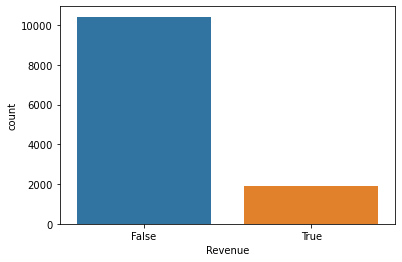

In [12]:
sns.countplot(data=df, x='Revenue');

In [13]:
df.Revenue.value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

**Plot the Pairplot for the dataset**

In [24]:
a = []
for i in df.columns:
    if (df[i].dtypes == 'int64' or df[i].dtypes == 'float64'):
        a.append(i)

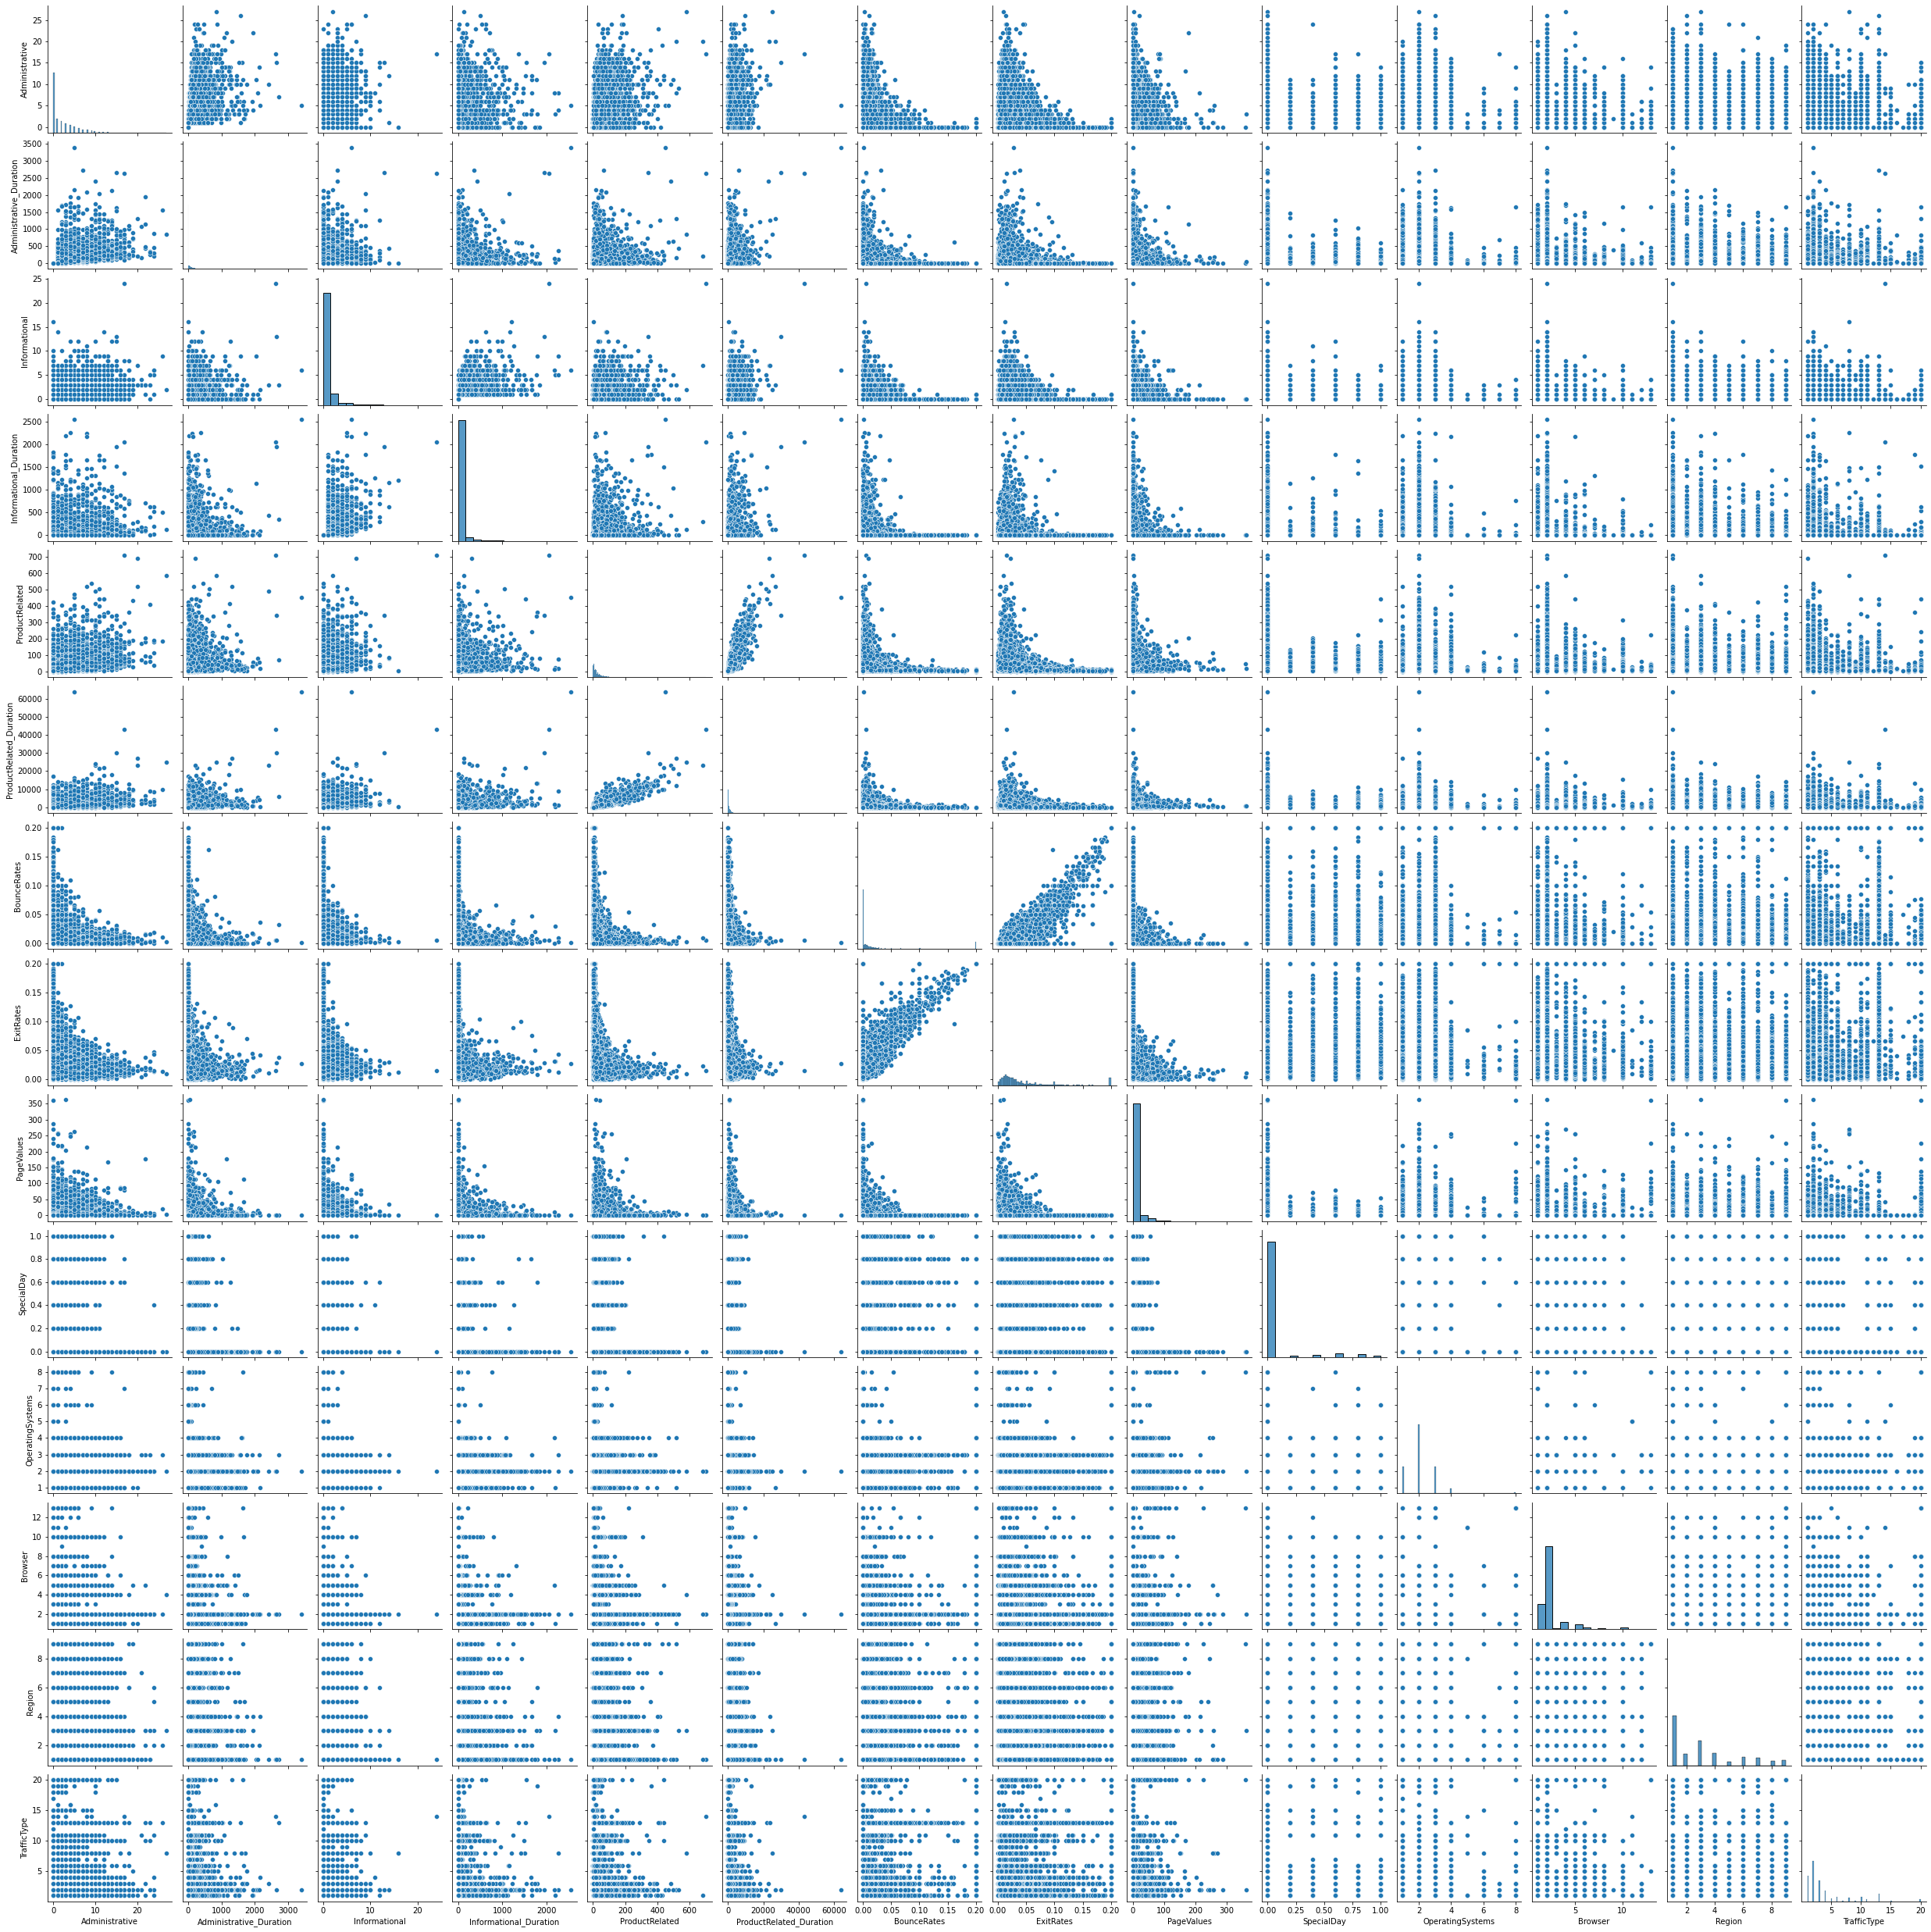

In [25]:
sns.pairplot(data=df[a]);

**Check for Object Data types**

In [26]:
b = []
for i in df.columns:
    if (df[i].dtypes == 'object' or df[i].dtypes == 'bool'):
        b.append(i)
df[b].head()

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False


**Check for outliers**

<AxesSubplot:>

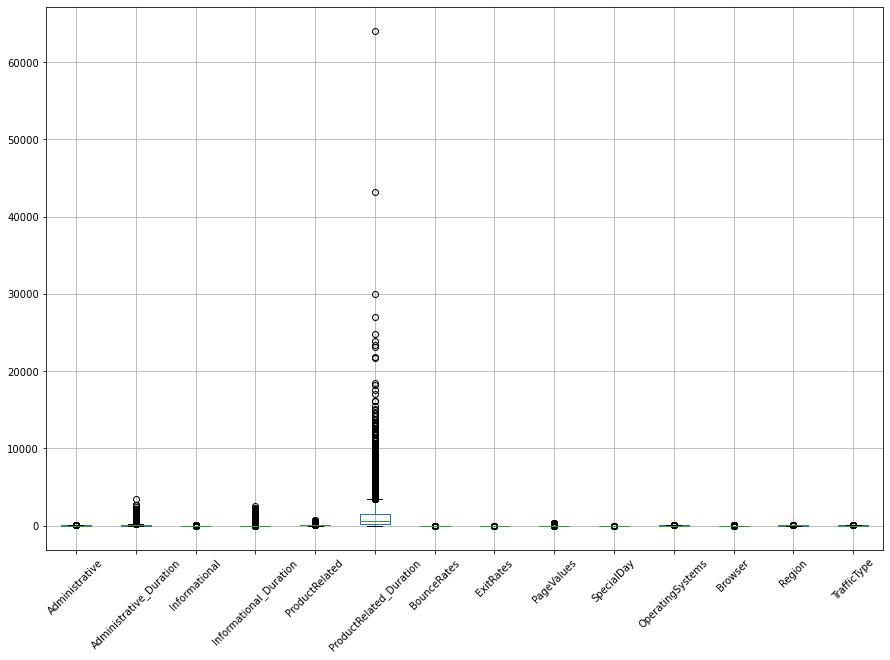

In [30]:
df[a].boxplot(figsize=(15,10),rot=45)

**Plot Correlation Heatmap**

Text(0.5, 1.0, 'correlation heatmap')

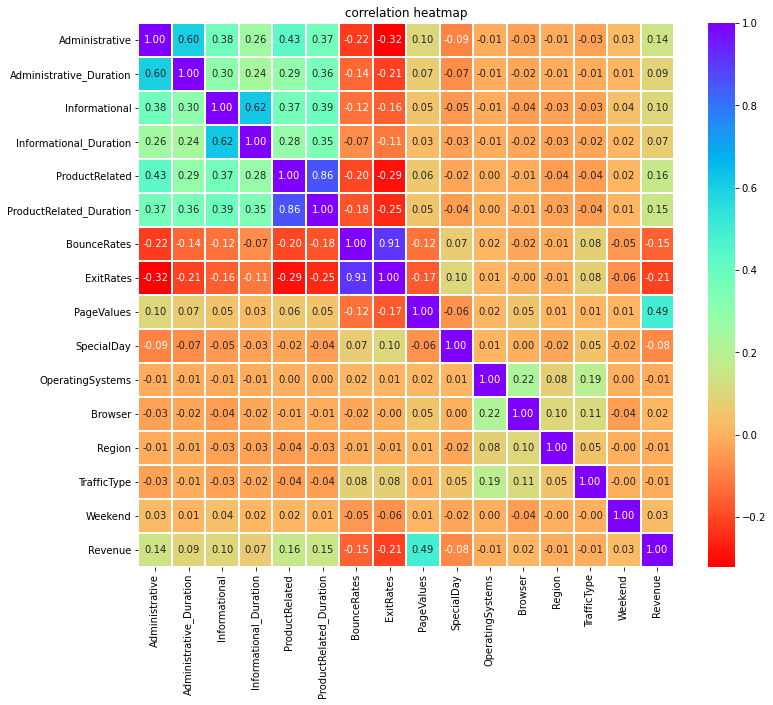

In [34]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=round(cor,2), annot=True, fmt='0.2f', cmap='rainbow_r',linewidths=1);
plt.title('correlation heatmap')

## Data Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.Month = le.fit_transform(X.Month)

In [38]:
visittype = pd.get_dummies(df.VisitorType,drop_first=True)

In [40]:
X = pd.concat((X,visittype), axis=1)
X = X.drop('VisitorType', axis=1)

In [41]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Other,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,False,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,False,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,False,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,False,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,True,0,1


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Splitting the data into Train and Test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [48]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building a Decision Tree Classifier Model and fit it on the Training Set

In [49]:
dt = DecisionTreeClassifier(random_state=123)

In [50]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

**Predictions on The training Set**

In [51]:
dt_pred_train = dt.predict(X_train)

**Check the Metrics for Predictions on the Training set**

[Accuracy Score, Classification Report, Confusion Matrix]

In [74]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score, confusion_matrix

In [53]:
print(classification_report(y_train,dt_pred_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8353
        True       1.00      1.00      1.00      1511

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



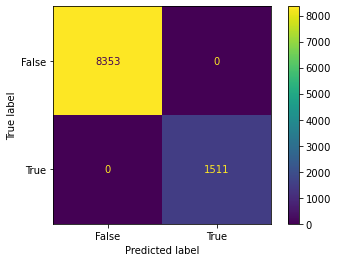

In [55]:
plot_confusion_matrix(estimator = dt, X=X_train, y_true=y_train)

## Building a Random Forest Classifier Model and fit it on the Training Set

In [56]:
rfc = RandomForestClassifier(random_state=123)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

**Predictions on The training Set**

In [58]:
rfc_pred_train = rfc.predict(X_train)

**Check the Metrics for Predictions on the Training set**

[Accuracy Score, Classification Report, Confusion Matrix]

In [59]:
print(classification_report(y_train,rfc_pred_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8353
        True       1.00      1.00      1.00      1511

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



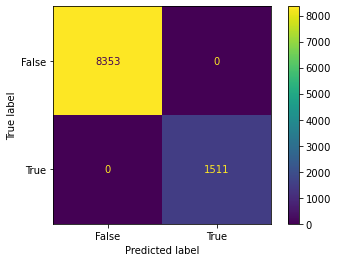

In [61]:
plot_confusion_matrix(estimator = rfc, X=X_train, y_true=y_train)

## Building an ANN Model and fit it on the Training Set

In [65]:
mpl = MLPClassifier(hidden_layer_sizes=(500), solver='sgd', random_state=500, max_iter=500)

In [66]:
mpl.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=500, max_iter=500, random_state=500,
              solver='sgd')

**Predictions on The training Set**

In [67]:
mpl_pred_train = mpl.predict(X_train)

**Check the Metrics for Predictions on the Training set**

[Accuracy Score, Classification Report, Confusion Matrix]

In [68]:
print(classification_report(y_train,mpl_pred_train))

              precision    recall  f1-score   support

       False       0.92      0.97      0.95      8353
        True       0.77      0.55      0.64      1511

    accuracy                           0.91      9864
   macro avg       0.85      0.76      0.79      9864
weighted avg       0.90      0.91      0.90      9864



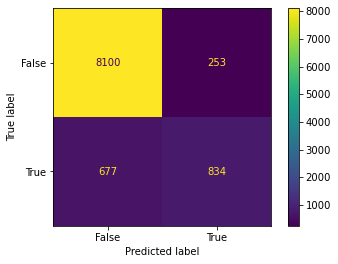

In [69]:
plot_confusion_matrix(estimator = mpl, X=X_train, y_true=y_train)

## Comparing Models on The test set

In [70]:
models=[dt,rfc,mpl]
models_names={dt:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mpl:'ANN'}

Accuracy for DecisionTreeClassifier model is 
 0.85117599351176


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

       False       0.91      0.91      0.91      2069
        True       0.54      0.55      0.54       397

    accuracy                           0.85      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.85      0.85      0.85      2466



Confusion Matrix for DecisionTreeClassifier model is


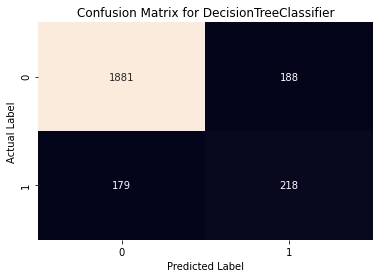

Accuracy for RandomForestClassifier model is 
 0.8913219789132197


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

       False       0.92      0.96      0.94      2069
        True       0.72      0.54      0.61       397

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



Confusion Matrix for RandomForestClassifier model is


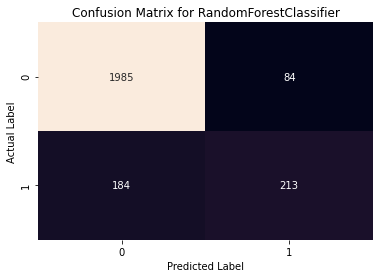

Accuracy for ANN model is 
 0.8824006488240065


Classification report for ANN model is 
               precision    recall  f1-score   support

       False       0.91      0.96      0.93      2069
        True       0.69      0.49      0.57       397

    accuracy                           0.88      2466
   macro avg       0.80      0.73      0.75      2466
weighted avg       0.87      0.88      0.87      2466



Confusion Matrix for ANN model is


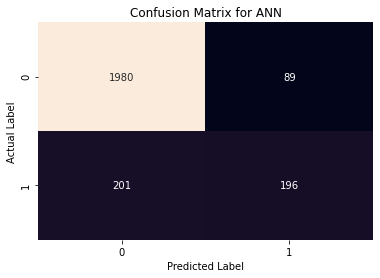

In [75]:
for i in models:
    i.fit(X_train,y_train)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(y_test,i.predict(X_test)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_test,i.predict(X_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(y_test,i.predict(X_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

**Compare ROC curves and Calculate Area under the curve for all models**

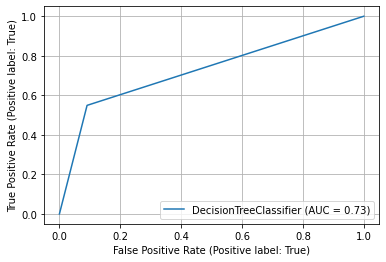

In [80]:
plot_roc_curve(estimator=dt,X=X_test,y=y_test)
plt.grid()

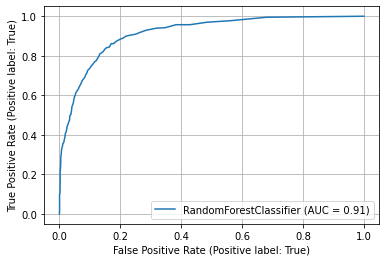

In [82]:
plot_roc_curve(estimator=rfc,X=X_test,y=y_test)
plt.grid()

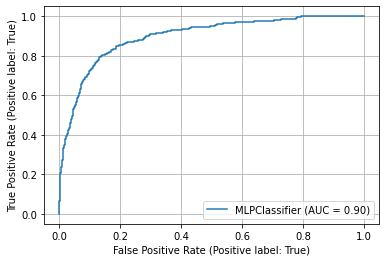

In [83]:
plot_roc_curve(estimator=mpl,X=X_test,y=y_test)
plt.grid()

## Conclusion